<a href="https://colab.research.google.com/github/Tina-Mulu/Carrefour-Market-Analysis-using-R-.-Unsupervised-Learning/blob/main/Copy_of_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Filter Methods**

This section requires you to perform feature selection through the use of the unsupervised learning methods learned earlier this week. You will be required to perform your analysis and provide insights on the features that contribute the most information to the dataset.

In [ ]:
sales <- read.csv('Supermarket_Dataset_1 - Sales Data.csv')
head(sales)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
# Installing and loading our caret package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

In [ ]:
# Installing and loading the corrplot package for plotting
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)


In [ ]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
#First checking out the class of each column

cls <- sapply(sales, class)
cls

#Next selecting Numeric Variables
Numeric_Variables <- sales %>% select(which(cls != "character"))
head(Numeric_Variables)


#Excluding categorical numerical variables to remain with only continuous variables
Continuous_Variables <- Numeric_Variables[,c(-2,-5)]
head(Continuous_Variables)

Invoice.ID                  Branch           Customer.type 
            "character"             "character"             "character" 
                 Gender            Product.line              Unit.price 
            "character"             "character"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"             "character" 
                   Time                 Payment                    cogs 
            "character"             "character"               "numeric" 
gross.margin.percentage            gross.income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric"

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


,Unit.price,Tax,cogs,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,26.1415,522.83,26.1415,9.1,548.9715
2,15.28,3.8200,76.40,3.8200,9.6,80.2200
3,46.33,16.2155,324.31,16.2155,7.4,340.5255
4,58.22,23.2880,465.76,23.2880,8.4,489.0480
5,86.31,30.2085,604.17,30.2085,5.3,634.3785
6,85.39,29.8865,597.73,29.8865,4.1,627.6165


In [ ]:
# Calculating the correlation matrix of only continuous variables
#

correlationMatrix <- cor(Continuous_Variables)
correlationMatrix


,Unit.price,Tax,cogs,gross.income,Rating,Total
Unit.price,1.000000000,0.6339621,0.6339621,0.6339621,-0.008777507,0.6339621
Tax,0.633962089,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000
cogs,0.633962089,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000
gross.income,0.633962089,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000
Rating,-0.008777507,-0.0364417,-0.0364417,-0.0364417,1.000000000,-0.0364417
Total,0.633962089,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000


In [ ]:
#Find attributes that are highly correlated
#

highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
highlyCorrelated

#Displaying the names of the hoghly correlated continuous variables
names(Continuous_Variables[,highlyCorrelated])

# Tax, cogs, and gross income are highly correlated

[1] 2 3 4

[1] "Tax"          "cogs"         "gross.income"

In [ ]:
# Removing Redundant Features 
#

Continuous_Variables2 <- Continuous_Variables[-highlyCorrelated]
head(Continuous_Variables2)

,Unit.price,Rating,Total
,<dbl>,<dbl>,<dbl>
1,74.69,9.1,548.9715
2,15.28,9.6,80.2200
3,46.33,7.4,340.5255
4,58.22,8.4,489.0480
5,86.31,5.3,634.3785
6,85.39,4.1,627.6165


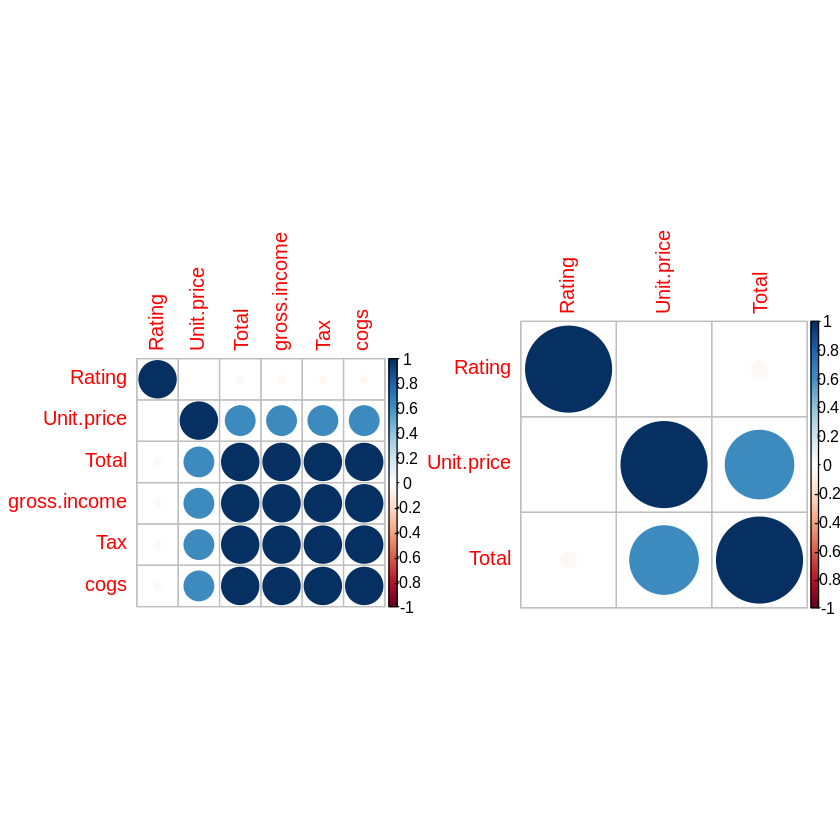

In [ ]:
# Performing our graphical comparison
# 

par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(Continuous_Variables2), order = "hclust")

# the variables left are not highly correlated

# **Wrapper Methods**

In [ ]:
#One-hot encoding of categorical variables
#

install.packages('dummies')
library(dummies)
Sales <- dummy.data.frame(sales, names=c("Branch","Customer.type","Gender","Product.line",
                "Payment"), sep="_")
head(Sales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


,Invoice.ID,Branch_A,Branch_B,Branch_C,Customer.type_Member,Customer.type_Normal,Gender_Female,Gender_Male,Product.line_Electronic accessories,Product.line_Fashion accessories,⋯,Date,Time,Payment_Cash,Payment_Credit card,Payment_Ewallet,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,1,0,0,1,0,1,0,0,0,⋯,1/5/2019,13:08,0,0,1,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,0,0,1,0,1,1,0,1,0,⋯,3/8/2019,10:29,1,0,0,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,1,0,0,0,1,0,1,0,0,⋯,3/3/2019,13:23,0,1,0,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,1,0,0,1,0,0,1,0,0,⋯,1/27/2019,20:33,0,0,1,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,1,0,0,0,1,0,1,0,0,⋯,2/8/2019,10:37,0,0,1,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,0,0,1,0,1,0,1,1,0,⋯,3/25/2019,18:30,0,0,1,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
#One-hot encoding of categorical variables
#

install.packages('dummies')
library(dummies)
Sales <- dummy.data.frame(sales, names=c("Branch","Customer.type","Gender","Product.line",
                "Payment"), sep="_")
head(Sales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


,Invoice.ID,Branch_A,Branch_B,Branch_C,Customer.type_Member,Customer.type_Normal,Gender_Female,Gender_Male,Product.line_Electronic accessories,Product.line_Fashion accessories,⋯,Date,Time,Payment_Cash,Payment_Credit card,Payment_Ewallet,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,1,0,0,1,0,1,0,0,0,⋯,1/5/2019,13:08,0,0,1,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,0,0,1,0,1,1,0,1,0,⋯,3/8/2019,10:29,1,0,0,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,1,0,0,0,1,0,1,0,0,⋯,3/3/2019,13:23,0,1,0,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,1,0,0,1,0,0,1,0,0,⋯,1/27/2019,20:33,0,0,1,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,1,0,0,0,1,0,1,0,0,⋯,2/8/2019,10:37,0,0,1,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,0,0,1,0,1,0,1,1,0,⋯,3/25/2019,18:30,0,0,1,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
#First checking out the class of each column

class <- sapply(Sales, class)
class

#Selecting only numerical variables
#

Sales2 <- Sales %>% select(which(class != "character"))
head(Sales2)

Invoice.ID                            Branch_A 
                        "character"                           "integer" 
                           Branch_B                            Branch_C 
                          "integer"                           "integer" 
               Customer.type_Member                Customer.type_Normal 
                          "integer"                           "integer" 
                      Gender_Female                         Gender_Male 
                          "integer"                           "integer" 
Product.line_Electronic accessories    Product.line_Fashion accessories 
                          "integer"                           "integer" 
    Product.line_Food and beverages      Product.line_Health and beauty 
                          "integer"                           "integer" 
    Product.line_Home and lifestyle      Product.line_Sports and travel 
                          "integer"                           "integer" 
                         Unit.price                            Quantity 
                          "numeric"                           "integer" 
                                Tax                                Date 
                          "numeric"                         "character" 
                               Time                        Payment_Cash 
                        "character"                           "integer" 
                Payment_Credit card                     Payment_Ewallet 
                          "integer"                           "integer" 
                               cogs             gross.margin.percentage 
                          "numeric"                           "numeric" 
                       gross.income                              Rating 
                          "numeric"                           "numeric" 
                              Total 
                          "numeric"

,Branch_A,Branch_B,Branch_C,Customer.type_Member,Customer.type_Normal,Gender_Female,Gender_Male,Product.line_Electronic accessories,Product.line_Fashion accessories,Product.line_Food and beverages,⋯,Quantity,Tax,Payment_Cash,Payment_Credit card,Payment_Ewallet,cogs,gross.margin.percentage,gross.income,Rating,Total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,1,0,1,0,0,0,0,⋯,7,26.1415,0,0,1,522.83,4.761905,26.1415,9.1,548.9715
2,0,0,1,0,1,1,0,1,0,0,⋯,5,3.8200,1,0,0,76.40,4.761905,3.8200,9.6,80.2200
3,1,0,0,0,1,0,1,0,0,0,⋯,7,16.2155,0,1,0,324.31,4.761905,16.2155,7.4,340.5255
4,1,0,0,1,0,0,1,0,0,0,⋯,8,23.2880,0,0,1,465.76,4.761905,23.2880,8.4,489.0480
5,1,0,0,0,1,0,1,0,0,0,⋯,7,30.2085,0,0,1,604.17,4.761905,30.2085,5.3,634.3785
6,0,0,1,0,1,0,1,1,0,0,⋯,7,29.8865,0,0,1,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
# Installing and loading our clustvarsel package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
                         
library(clustvarsel)


In [ ]:
# Installing and loading our mclust package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
library(mclust)


In [ ]:
# Sequential forward greedy search (default)
# ---
#
out = clustvarsel(Continuous_Variables, G = 1:5)
out

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step   BICclust Model G   BICdiff Decision
               Tax          Add  -7382.354     V 4  389.0238 Accepted
        Unit.price          Add -15963.159   EVV 5  316.6680 Accepted
            Rating          Add -20018.948   EVV 5 -122.0995 Rejected
        Unit.price       Remove  -7384.156     V 4  318.4702 Rejected

Selected subset: Tax, Unit.price

In [ ]:
#Having identified the variables that we use, we proceed to build the clustering model 
#

Subset1 = Sales2[,out$subset]
mod = Mclust(Subset1, G = 1:5)
summary(mod)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EII (spherical, equal volume) model with 2 components: 

 log-likelihood    n df       BIC       ICL
       -981.616 1000  6 -2004.679 -2009.603

Clustering table:
  1   2 
340 660 

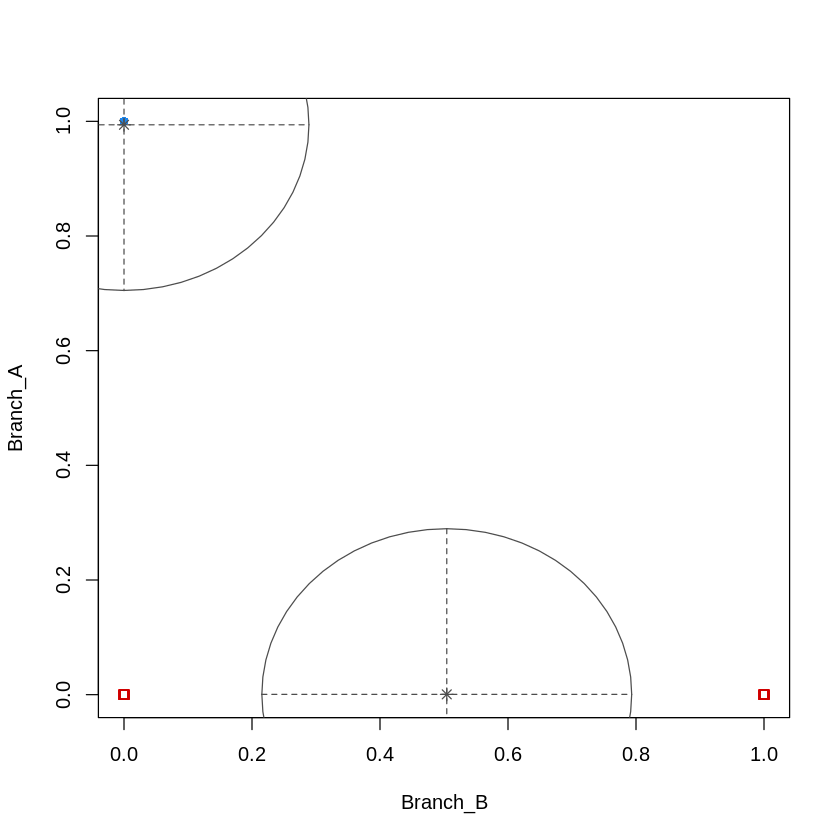

In [ ]:
#Plotting the model
#

plot(mod,c("classification"))

# **Feature Ranking**

In [ ]:
#Installation and loading of the required packages
# 

suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [ ]:
#Using of entropy - based approach to perform feature ranking
#

Scores <- information.gain(Total~., Sales2)
Scores

,attr_importance
,<dbl>
Branch_A,0.0000000
Branch_B,0.0000000
Branch_C,0.0000000
Customer.type_Member,0.0000000
Customer.type_Normal,0.0000000
Gender_Female,0.0000000
Gender_Male,0.0000000
Product.line_Electronic accessories,0.0000000
Product.line_Fashion accessories,0.0000000


In [ ]:
#Algorithm to select a cut-off subset
#

Subset <- cutoff.k(Scores, 5)
as.data.frame(Subset)

Subset
<chr>
Tax
cogs
gross.income
Quantity
Unit.price


In [ ]:
#Setting cutoff as a percentage.

Subset2 <-cutoff.k.percent(Scores, 0.2)
as.data.frame(Subset2)


Subset2
<chr>
Tax
cogs
gross.income
Quantity
Unit.price


All the methods narrowed down to the most important features to be used for analysis. 